In [ ]:
from google.colab import drive
 
# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import cv2 as cv
import pandas as pd
import sklearn.model_selection
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

file_name ="drive/My Drive/Colab Notebooks/Dataset.csv"
dataset = pd.read_csv(file_name)
infections = dataset['New'].values
deaths = dataset['Deaths'].values
x = range(len(infections))
t = np.array(np.log(infections))
T=t.reshape(len(infections),1)

In [ ]:
def generate_polynomial_features(n_order,x_train, x_test,x_val):
  X_train = np.array([list(map(lambda n: pow(i, n), range(0, n_order+1))) for i in x_train])
  X_val = np.array([list(map(lambda n: pow(i, n), range(0, n_order+1))) for i in x_val])
  X_test = np.array([list(map(lambda n: pow(i, n), range(0, n_order+1))) for i in x_test])
  X = np.array([list(map(lambda n: pow(i, n), range(0, n_order+1))) for i in x])
  X_train = sc_X.fit_transform(X_train)
  X_val = sc_X.fit_transform(X_val)
  X_test = sc_X.fit_transform(X_test)
  X = sc_X.fit_transform(X)
  X[:,0]  = np.ones(X.shape[0])
  X_train[:,0]  = np.ones(X_train.shape[0])
  X_val[:,0]  = np.ones(X_val.shape[0])
  X_test[:,0]  = np.ones(X_test.shape[0])
  # X_train=X_train*1./np.max(X_train, axis=0)   #normalize
  # X_val=X_val*1./np.max(X_val, axis=0)   #normalize
  # X_test=X_test*1./np.max(X_test, axis=0)   #normalize
  return X_train, X_test , X_val ,X

In [ ]:
def generate_N_dimention_matrix(n_order):
  X = np.array([list(map(lambda n: pow(i, n), range(0, n_order+1))) for i in x])
  X = sc_X.fit_transform(X)
  X[:,0]  = np.ones(X.shape[0])
  return X

In [ ]:
def split_data(X , T):
  # train 0.6 , test = 0.2 , val = 0.2
  X_train, X_test, y_train, y_test  = sklearn.model_selection.train_test_split(X, T, test_size=0.2, random_state=1)
  X_train, X_val, y_train, y_val = sklearn.model_selection.train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2
  plt.plot(X_train, y_train, 'o', color='green')
  plt.plot(X_val, y_val, 'o', color='black')
  plt.plot(X_test, y_test, 'o', color='red')
  return X_train, X_test, y_train, y_test , X_val, y_val

In [ ]:
def update(x,t,theta,alpha):
  N= len(t)
  y=np.dot(x,theta)
  theta=theta - (alpha/(float(N)))*(x.T.dot((y-t)))
  return theta

In [ ]:
def train(x,t,theta,alpha,epochs):
  for e in range(epochs):
    theta = update(x,t,theta,alpha)
  return theta 

In [ ]:
 def calc_cost(x,t,theta):
  N = len(t)
  y=np.dot(x,theta)
  err = np.sum(np.square(y-t))/(2*N)
  return err

1  :  
Training data cost :  0.3089279005595572 
Validation data cost :  0.4696557725294205 
Test data cost :  0.6439347819607493
2  :  
Training data cost :  0.2296948481841254 
Validation data cost :  0.34420774742272137 
Test data cost :  0.47100365337348765
3  :  
Training data cost :  0.20701539564787586 
Validation data cost :  0.32196013728284745 
Test data cost :  0.4431608162696787
4  :  
Training data cost :  0.17784182690460146 
Validation data cost :  0.28481307407242135 
Test data cost :  0.3825120689060992
5  :  
Training data cost :  0.1807651411467704 
Validation data cost :  0.28808397763690524 
Test data cost :  0.3801624931244777
6  :  
Training data cost :  0.18161464054581533 
Validation data cost :  0.28983832206661325 
Test data cost :  0.38440584132445244
7  :  
Training data cost :  0.17812467825788933 
Validation data cost :  0.2843604323691885 
Test data cost :  0.3778731516283038
8  :  
Training data cost :  0.17464681228492387 
Validation data cost :  0.277

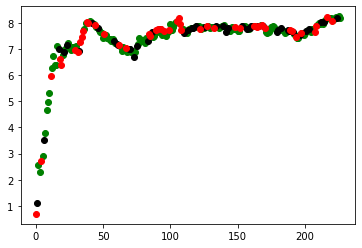

In [ ]:
alpha = 0.0001
epochs = 1000000
n_order = 16
N= len(t)
results_theta = {}
results_train_cost={}
results_test_cost={}
results_validation_cost={}
x_train, x_test, y_train, y_test , x_val, y_val = split_data(x,T)
for n in range(1,n_order):
  theta = np.array([[0] for row in range(n+1)])
  X_train, X_test, X_val , X = generate_polynomial_features(n,x_train, x_test,x_val)
  theta = train(X_train , y_train,theta , alpha , epochs*n)
  results_theta[n-1]=theta
  results_train_cost[n-1] = calc_cost(X_train,y_train,theta)
  results_validation_cost[n-1] = calc_cost(X_val, y_val,theta)
  results_test_cost[n-1] = calc_cost(X_test, y_test,theta)
  # y = np.dot(X,theta)
  # plt.plot( np.array(range(N)), y)
  print(n," : ","\nTraining data cost : ",results_train_cost[n-1] , "\nValidation data cost : ",results_validation_cost[n-1], "\nTest data cost : ",results_test_cost[n-1])

In [ ]:
def show_diagram(degree):
    X = generate_N_dimention_matrix(degree)
    y = np.dot(X,results_theta[degree-1])
    plt.plot(x,y)

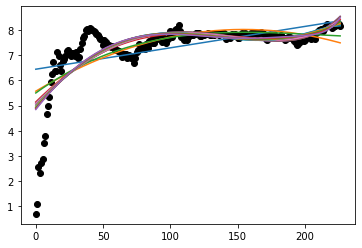

In [ ]:
plt.plot(x,t,"o",color = "black")
for n in range(1,n_order):
    show_diagram(n)

Result degree :  15 
Result Training data cost :  0.16387350899011593 
Result Validation data cost :  0.25889631221687454 
Result Test data cost :  0.3370988366683944 
Result theta :  [[ 7.40384419]
 [ 4.48495452]
 [-6.29720003]
 [-0.45873224]
 [ 1.85691458]
 [ 1.73401368]
 [ 0.88021196]
 [ 0.06514677]
 [-0.47504199]
 [-0.72222742]
 [-0.73025159]
 [-0.56687285]
 [-0.29337433]
 [ 0.04094113]
 [ 0.39877894]
 [ 0.75313247]]


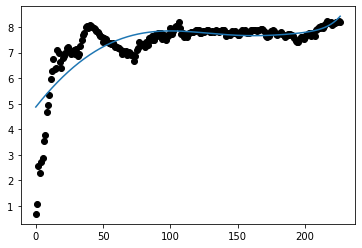

In [ ]:
result_degree = min(results_validation_cost, key=results_validation_cost.get)
result_theta = results_theta[result_degree]
result_train_cost = results_train_cost[result_degree]
result_validation_cost = results_validation_cost[result_degree]
result_test_cost = results_test_cost[result_degree]
print("Result degree : ",result_degree+1,"\nResult Training data cost : ",result_train_cost , "\nResult Validation data cost : ",result_validation_cost, "\nResult Test data cost : ",result_test_cost,"\nResult theta : ",result_theta)
plt.plot(x,t,"o",color = "black")
show_diagram(result_degree)

<p dir="rtl">
برای پیدا کردن theta مطلوب که مدلی مناسب از دیتا ما را ایجاد کند بر روی train-set از الگوریتم gradient descent استفاده می کنیم و سعی می کنیم cost را در هر epoch کم کنیم از آنجایی که نمی خواهیم دچار overfit نوشیم از validation-set استفاده می کنیم و cost را برای هر درجه محاسبه می کنیم و  بین cost های بدست آمده minimum را انتخاب میکنیم طبق مدل train شده درجه ۱۰ بهترین cost را در هر دو train-set  و validation-set دارد و در آخر هم مقدار cost را برای درجه ۱۰ روی test-set محاسبه می کنیم و نمایش می دهیم .
</p>